In [48]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [49]:
directory='C:/Users/HP/Documents/AIML_Project/Song_Recommendation_System/Data'
File_name='Song_Recommendion_Train.csv'
Train_csv_path=os.path.join(directory,File_name)

In [60]:
# Reading Source file
data = pd.read_csv(Train_csv_path, encoding='ISO-8859-1')

In [4]:
data.head()

,Unnamed: 0,user_id,song_id,listen_count,title,release,artist_name,year
0,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


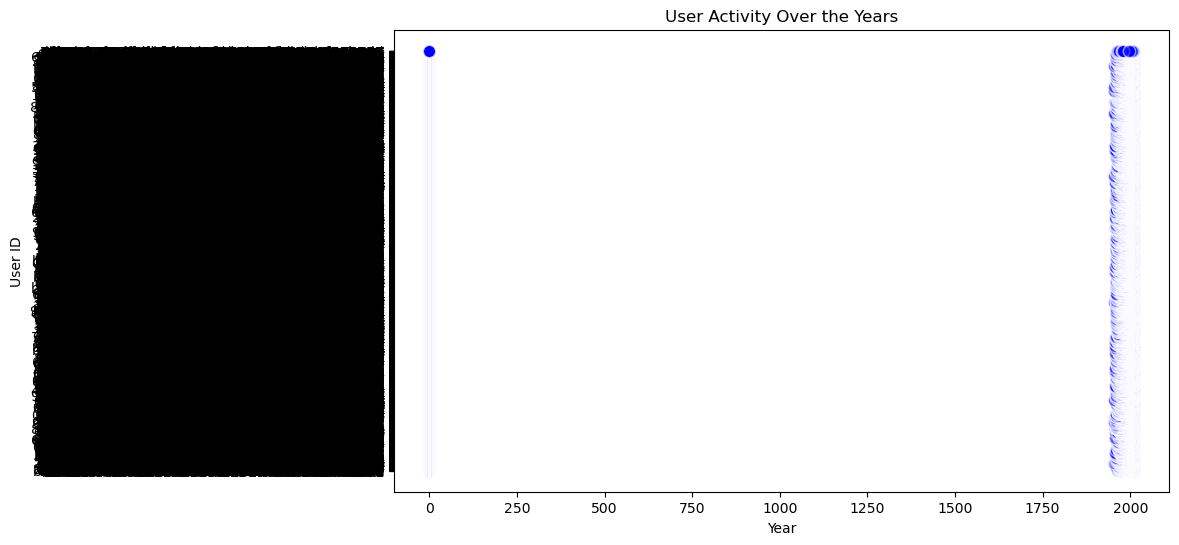

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(data['year'], data['user_id'], alpha=0.6, c='blue', edgecolors='w', s=80)
plt.xlabel('Year')
plt.ylabel('User ID')
plt.title('User Activity Over the Years')
plt.show()

#### We can see some year feature has some outlier (eg. Year value is zero)

In [61]:
# Remove transactions where the 'year' value is zero
data = data[data['year'] > 0]

In [62]:
data.shape

(81514, 8)

#### we can see there is 18486 row with wrong data value in year column
#### we have remove those rows now from our datasets 

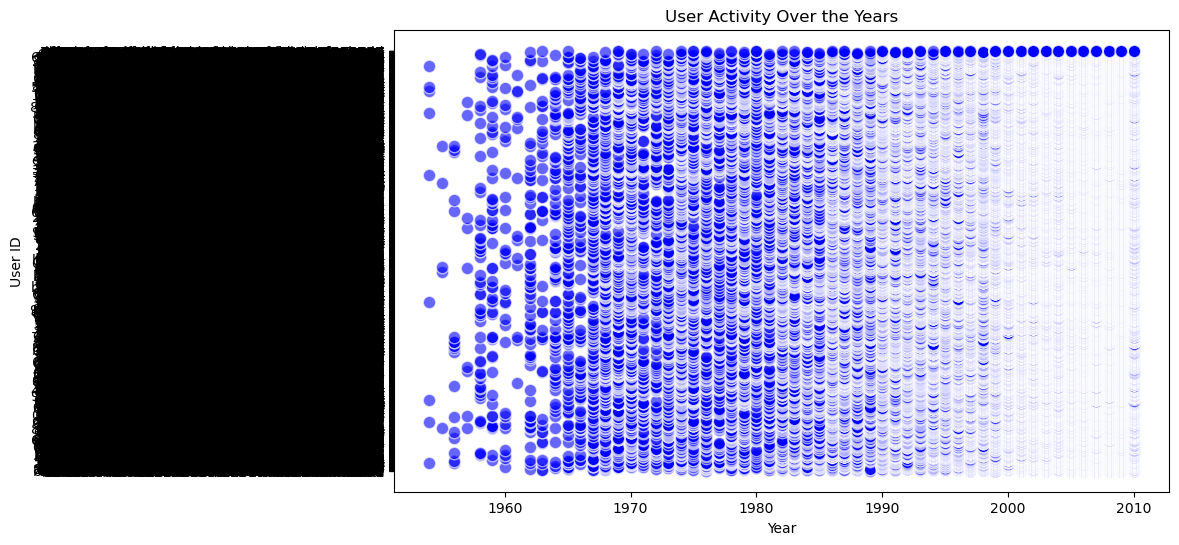

In [54]:
#now plotting again scatter plot graph for better visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['year'], data['user_id'], alpha=0.6, c='blue', edgecolors='w', s=80)
plt.xlabel('Year')
plt.ylabel('User ID')
plt.title('User Activity Over the Years')
plt.show()

## Observation:
### We have 8 features/ column : Unnamed Column, User ID, Song ID, Listen Count, Song Title, Release, Artist Name and Year
### We can see dataset with Unnamed which is Sr. No. we can remove it.
### Let's Check Below field and handle them:
#### Data Frame Shape
#### Missing Value
#### Wrong Data/Value
#### Duplicates Transaction
#### Remove Unwanted Features

#### We can see we have 81514 Transaction with 8 feature column.
#### Unnamed column is only Sr. No. of transaction we need to remove that fetures to check Duplicates.

### Remove Unnamed (Unwanted) Column

In [63]:
# Remove Unnamed Column
data=data.drop(data.columns[0],axis=1)

In [64]:
data.head(2)

,user_id,song_id,listen_count,title,release,artist_name,year
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007


In [65]:
data.shape

(81514, 7)

#### Now we have 81514 Transaction with 7 features, let's check duplicate.

### Check Duplicates and Remove them

In [17]:
# Remove Duplicates transaction from data
duplicate=data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [user_id, song_id, listen_count, title, release, artist_name, year]
Index: []


#### We can see we don't have any duplicates transaction data.

### Let's Check Missing Values and Handle them

In [66]:
data_miss=data.isnull().sum()
print(data_miss)

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64


#### We can see we don't any missing data

### Let's handle wrong format data

In [67]:
# Remove transactions where the 'year' value is in the future (greater than 2024)
#data['year']=[data.drop(index=x) for x in data.index if data.loc[x, 'year'] > 2024] #Giving Length of values (0) error
wrong_data=[]
for x in data.index:
    if data.loc[x, 'year'] > 2024:  # Use loc with index and column name
        wrong_data.append(data.drop(index=x))    # Drop row by index

In [68]:
print(wrong_data)

[]


#### We can we don't have any wrong data in year column

## Store Cleaned dataset for Model Building 

In [74]:
Clean_File_Name='modified_data.csv'
Clean_csv_path=os.path.join(directory,Clean_File_Name)

In [76]:
data.to_csv(Clean_csv_path, index=False)